In [0]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [0]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [5]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [6]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])


model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Using TensorFlow backend.


Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 301us/step - loss: 0.7186 - accuracy: 0.4795 - val_loss: 0.7147 - val_accuracy: 0.3881
Epoch 2/100
1022/1022 [==============================] - 0s 43us/step - loss: 0.7069 - accuracy: 0.3914 - val_loss: 0.7032 - val_accuracy: 0.3242
Epoch 3/100
1022/1022 [==============================] - 0s 44us/step - loss: 0.6997 - accuracy: 0.3738 - val_loss: 0.6961 - val_accuracy: 0.4338
Epoch 4/100
1022/1022 [==============================] - 0s 45us/step - loss: 0.6941 - accuracy: 0.4902 - val_loss: 0.6903 - val_accuracy: 0.6119
Epoch 5/100
1022/1022 [==============================] - 0s 41us/step - loss: 0.6892 - accuracy: 0.6311 - val_loss: 0.6854 - val_accuracy: 0.7443
Epoch 6/100
1022/1022 [==============================] - 0s 40us/step - loss: 0.6844 - accuracy: 0.7466 - val_loss: 0.6805 - val_accuracy: 0.7945
Epoch 7/100
1022/1022 [==============================] - 0s 45us/step - loss

In [7]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 50us/step


0.8812785148620605

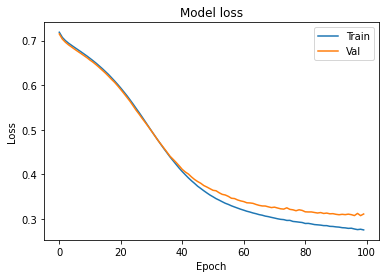

In [8]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [9]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4890 - accuracy: 0.7534 - val_loss: 0.3789 - val_accuracy: 0.8311
Epoch 2/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3579 - accuracy: 0.8591 - val_loss: 0.3568 - val_accuracy: 0.8447
Epoch 3/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3051 - accuracy: 0.8767 - val_loss: 0.2905 - val_accuracy: 0.8813
Epoch 4/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2921 - accuracy: 0.8865 - val_loss: 0.2894 - val_accuracy: 0.8813
Epoch 5/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2799 - accuracy: 0.8924 - val_loss: 0.2717 - val_accuracy: 0.8813
Epoch 6/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2432 - accuracy: 0.8992 - val_loss: 0.2591 - val_accuracy: 0.8813
Epoch 7/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2475

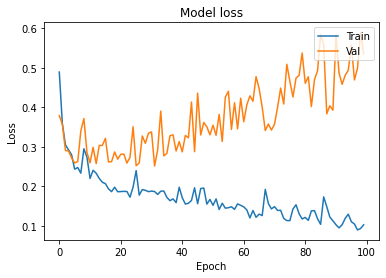

In [10]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [0]:
from keras.layers import Dropout
from keras import regularizers

In [12]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 14.5736 - accuracy: 0.6233 - val_loss: 4.0158 - val_accuracy: 0.7991
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.7068 - accuracy: 0.8356 - val_loss: 0.6466 - val_accuracy: 0.8630
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5647 - accuracy: 0.8640 - val_loss: 0.5186 - val_accuracy: 0.8539
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5328 - accuracy: 0.8483 - val_loss: 0.5214 - val_accuracy: 0.8447
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4829 - accuracy: 0.8855 - val_loss: 0.6200 - val_accuracy: 0.7900
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4687 - accuracy: 0.8865 - val_loss: 0.5484 - val_accuracy: 0.8174
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.471

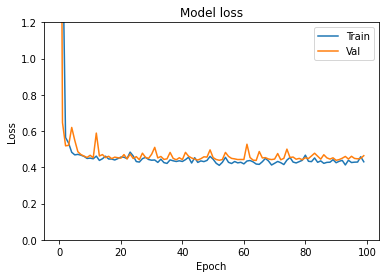

In [13]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()